# pysentimiento: A multilingual toolkit for Sentiment Analysis and SocialNLP tasks

En esta notebook mostramos un breve ejemplo de cómo usar [pysentimiento](https://github.com/pysentimiento/pysentimiento/), un toolkit multilingual para extracción de opiniones y análisis de sentimientos (aunque centrado en el idioma español)

`pysentimiento` es un una librería que utiliza modelos pre-entrenados de [transformers](https://github.com/huggingface/transformers) para distintas tareas de SocialNLP. Usa como modelos bases a [BETO](https://github.com/dccuchile/beto) y [RoBERTuito](https://github.com/pysentimiento/robertuito) en Español, BERTweet en inglés, y otros modelos similares en italiano y portugués.

--

In this notebook we show a brief example of how to use [pysentimiento](https://github.com/pysentimiento/pysentimiento/), a multilingual toolkit for opinion mining and sentiment analysis.

`pysentimiento` is a library that uses pre-trained models of [transformers] (https://github.com/huggingface/transformers) for different SocialNLP tasks. It uses as base models [BETO] (https://github.com/dccuchile/beto) and [RoBERTuito] (https://github.com/pysentimiento/robertuito) in Spanish, BERTweet in English, and similar models in Italian and Portuguese.


First, let's install the library

In [ ]:
!pip install pysentimiento

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.w

Let's create an analyzer. The `create_analyzer` receives the task and the language as parameters.

In [ ]:
from pysentimiento import create_analyzer
import transformers

transformers.logging.set_verbosity(transformers.logging.ERROR)

analyzer = create_analyzer(task="sentiment", lang="es")



Let's check out some examples:

Veamos algunos ejemplos:

In [ ]:
analyzer.predict("Qué gran jugador es Messi")

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [ ]:
analyzer.predict("Esto es pésimo")

AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.098, POS: 0.014})

In [ ]:
analyzer.predict("Qué es esto?")

AnalyzerOutput(output=NEU, probas={NEU: 0.548, NEG: 0.412, POS: 0.041})

##Aplicamos Analisis de Sentimiento a la base de Twitter

In [ ]:
# Let's import nltk and pandas
# We actually already imported nltk before in the setup cell and downloaded a bunch of
# dependencies.

import pandas as pd
import nltk

In [ ]:
# Download the dataset and create a Pandas Dataframe
%%capture
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np

dataset = load_dataset("carblacac/twitter-sentiment-analysis", "None")
# Stratified Sample of Dataset
datapoints = 10000

X_train, _, y_train, _ = train_test_split(dataset["validation"]["text"], dataset["validation"]["feeling"],
                                                    train_size=datapoints, random_state=0,
                                                    stratify=dataset["validation"]["feeling"])

df = pd.DataFrame({"text": X_train, "positive": y_train})
df["positive"] = df["positive"].astype("bool")

# We save some memory by deallocating the downloaded dataset
dataset = None

In [ ]:
# Let's peek into the dataset
df

,text,positive
0,@mikabee1103 LOL found her! I'm glad pro pictu...,False
1,Nooooooooooo rain! Please stop raining before ...,False
2,Home on the island,True
3,I'm going back to my facebook page. This is bo...,False
4,Laying back down,True
...,...,...
9995,@pmolyneux You guys have been working on Dimit...,True
9996,"@pandamares uh oh...What did Heaven do? And, ...",False
9997,aww crap ... gotta put the new clean sheets an...,False
9998,@marcforrest we're both taking great kid photo...,True


In [ ]:
def predict_sentiment (text):
    if isinstance(text, float) and np.isnan(text):
        return np.nan
    else:
        return analyzer.predict(str(text)).output

In [ ]:
df['Sentimiento']=df['text'].apply(predict_sentiment)

In [ ]:
df.head(15)

,text,positive,Sentimiento
0,@mikabee1103 LOL found her! I'm glad pro pictu...,False,POS
1,Nooooooooooo rain! Please stop raining before ...,False,NEG
2,Home on the island,True,NEU
3,I'm going back to my facebook page. This is bo...,False,NEG
4,Laying back down,True,NEG
5,"@LaughoutLarga Haha same here, I don't want su...",False,NEG
6,Hmph i wish he would call,False,NEU
7,@furiousball that doesn't sound too good,False,NEU
8,"@jo_whit Uurgh! Work... not good, espc not o...",True,NEG
9,thinking about demi lovato's cd . im sooo gonn...,True,NEU


<ipython-input-21-a83cf991a2a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['sentimiento_binario'] = df_filtrado['Sentimiento'].apply(lambda x: True if x in ['POS'] else False)


Accuracy: 0.85


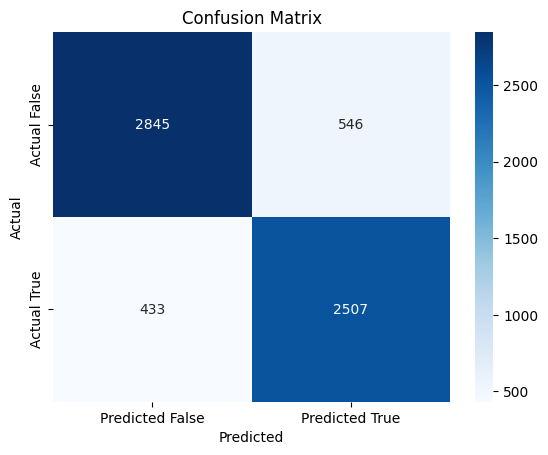

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para excluir la categoría "neutro"
df_filtrado = df.loc[df['Sentimiento'] != 'NEU']

# Convertir sentimiento a binario
df_filtrado['sentimiento_binario'] = df_filtrado['Sentimiento'].apply(lambda x: True if x in ['POS'] else False)

# Calcular la precisión
accuracy = accuracy_score(df_filtrado['positive'], df_filtrado['sentimiento_binario'])
print(f'Accuracy: {accuracy:.2f}')

# Crear la matriz de confusión
cm = confusion_matrix(df_filtrado['positive'], df_filtrado['sentimiento_binario'])

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Emojis

It supports the use of emojis through the [emoji](https://pypi.org/project/emoji/) library.

Soporta también el uso de emojis

In [ ]:
analyzer.predict("🤢")

AnalyzerOutput(output=NEG, probas={NEG: 0.936, NEU: 0.057, POS: 0.007})

O de hashtags

In [ ]:
analyzer.predict("#EstoEsUnaMierda")

AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.020, POS: 0.004})

## Emotion Analysis

`pysentimiento` provee análisis de emociones a través de modelos pre-entrenados con los datasets de [EmoEvent](https://github.com/fmplaza/EmoEvent-multilingual-corpus/)

In [ ]:
emotion_analyzer = create_analyzer(task="emotion", lang="en")

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
emotion_analyzer.predict("This is so terrible...")

AnalyzerOutput(output=sadness, probas={sadness: 0.978, fear: 0.013, disgust: 0.003, others: 0.002, surprise: 0.002, anger: 0.001, joy: 0.001})

In [ ]:
emotion_analyzer.predict("omg")

AnalyzerOutput(output=surprise, probas={surprise: 0.982, others: 0.007, fear: 0.003, joy: 0.003, sadness: 0.002, anger: 0.002, disgust: 0.001})

In [ ]:
emotion_analyzer.predict("yayyyy")

AnalyzerOutput(output=joy, probas={joy: 0.879, others: 0.106, surprise: 0.005, anger: 0.005, sadness: 0.002, disgust: 0.002, fear: 0.002})

In [ ]:
emotion_analyzer.predict("People in the world is really worried because of Coronavirus")

AnalyzerOutput(output=fear, probas={fear: 0.939, others: 0.043, surprise: 0.005, joy: 0.004, disgust: 0.004, sadness: 0.002, anger: 0.002})

## Hate Speech

`pysentimiento` also supports hate speech detection, by training models using the [HatEval](https://competitions.codalab.org/competitions/19935) dataset

In [ ]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

loading configuration file config.json from cache at /users/jmperez/.cache/huggingface/hub/models--pysentimiento--robertuito-hate-speech/snapshots/db125ee7be2ad74457b900ae49a7e0f14f7a496c/config.json
Model config RobertaConfig {
  "_name_or_path": "pysentimiento/robertuito-hate-speech",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "hateful",
    "1": "targeted",
    "2": "aggressive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "aggressive": 2,
    "hateful": 0,
    "targeted": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",

This model is a multi-label classification algorithm, returning three different variables at the same time:

- Is the message hateful or not?
- Is the hateful message targeted at a specific person or a group?
- Is the hateful message aggressive?

In [ ]:
hate_speech_analyzer.predict("Esto es una mierda pero no es odio")

AnalyzerOutput(output=[], probas={hateful: 0.020, targeted: 0.006, aggressive: 0.016})

In [ ]:
hate_speech_analyzer.predict("Esto es odio porque los inmigrantes deben ser aniquilados")

AnalyzerOutput(output=['hateful', 'aggressive'], probas={hateful: 0.902, targeted: 0.009, aggressive: 0.539})

In [ ]:
hate_speech_analyzer.predict("Vaya guarra barata y de poca monta es Juana Pérez!")

AnalyzerOutput(output=['hateful', 'targeted', 'aggressive'], probas={hateful: 0.982, targeted: 0.982, aggressive: 0.964})